## Central Limit With toy data:

let $X_{1}, ..., X_{N}$ a set of $uniform$ variables , for large number $N$, the distribution of means $\dfrac{X_{1}+...+ X_{N}}{N}$ tend towards a $gaussian$.
we can model this by a $central$$~$$limit$ class.

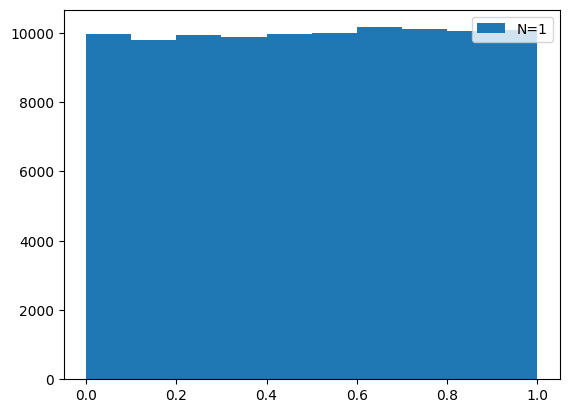

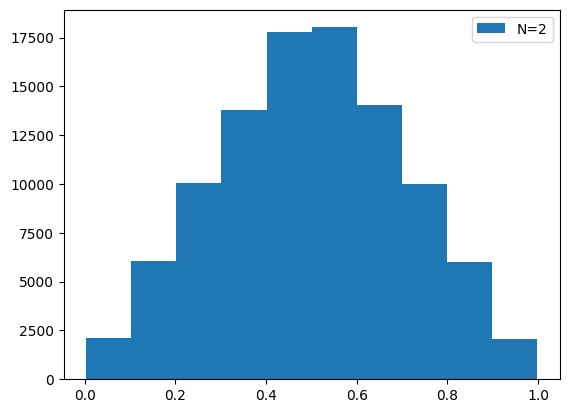

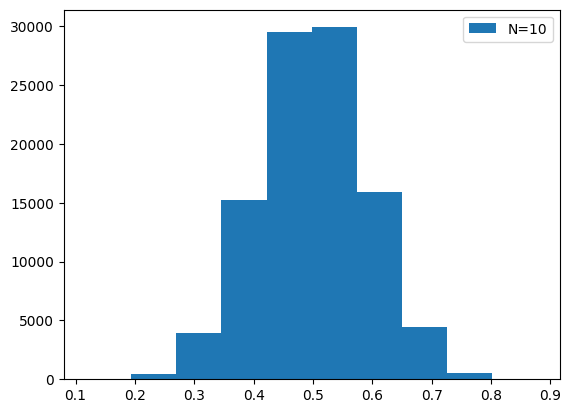

In [1]:
import numpy as np
from numpy.random import binomial, uniform
import matplotlib.pyplot as plt
np.random.seed(0)


class CentralLimit:

    def __init__(self, N_size:int=10, n_samples=100000):
        
        self.N=N_size
        self.n_samples=n_samples

    def fit(self, dist:callable):
         means=[]
         for _ in range(self.n_samples):
             sample=dist(0, 1, self.N)
             sample=np.array(sample)
             mean=sample.sum()/len(sample)
             means.append(mean)
         return means

    def visualize(self, dist):
          plt.hist(self.fit(dist),label='N='+str(self.N))
          plt.legend()
          plt.show()

for N in [1, 2, 10]:
    TCL=CentralLimit( N_size=N)
    TCL.fit(uniform)
    TCL.visualize(uniform)            
             
# you can try with  binomial distribution    

## Central Limit Theorem with Real-Data:

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#suppress the unecessary warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.filterwarnings('ignore')
from os.path import join
from tqdm import tqdm
from collections import Counter

In [3]:
data=pd.read_csv(r"/kaggle/input/data-science-job-salaries/ds_salaries.csv")
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


## Preprocessing data:

we want to visualize the $distributions$ of $salaries $ of jobs who has a significat samples.

In [4]:
JOBS=np.array(data['job_title'])
dic=Counter(JOBS)
significant_jobs=list(dic.keys())[:5]
significant_jobs

['Data Scientist',
 'Machine Learning Scientist',
 'Big Data Engineer',
 'Product Data Analyst',
 'Machine Learning Engineer']

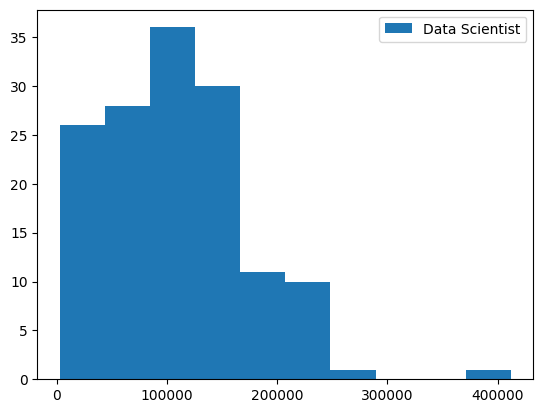

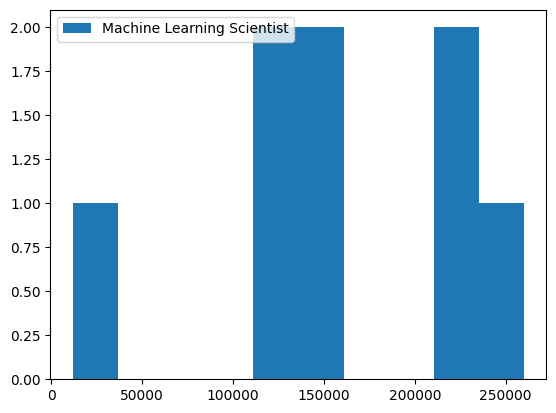

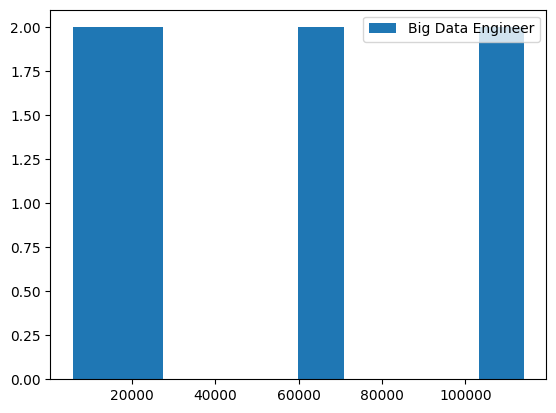

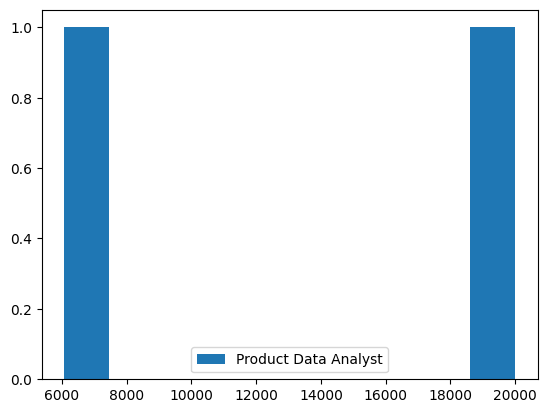

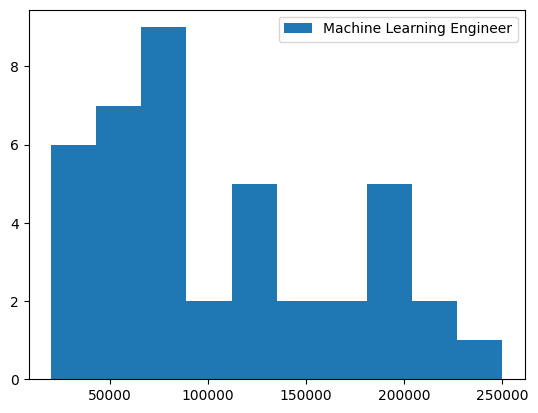

In [5]:
for job in significant_jobs:
  DATA=data.loc[data['job_title']==job]
  salaries=np.array(DATA['salary_in_usd'])
  salaries
  plt.hist(salaries, label=job)
  plt.legend()
  plt.show()

## Appplying TCL:


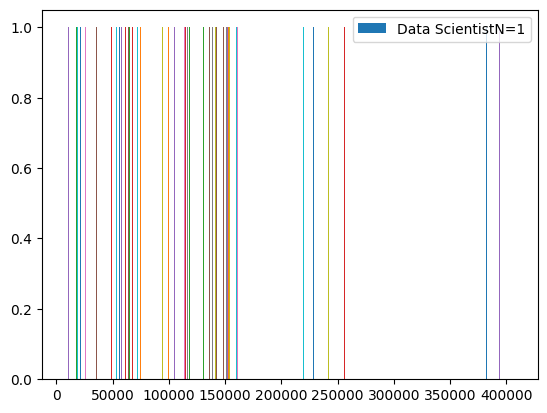

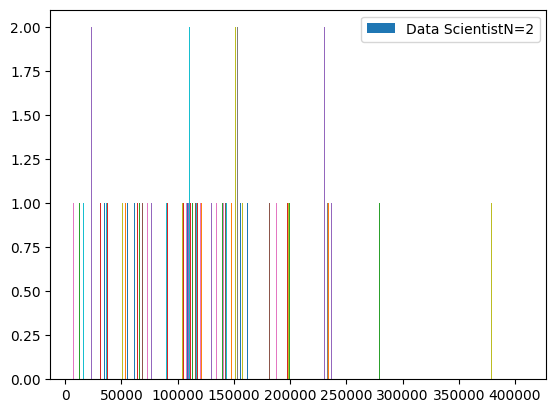

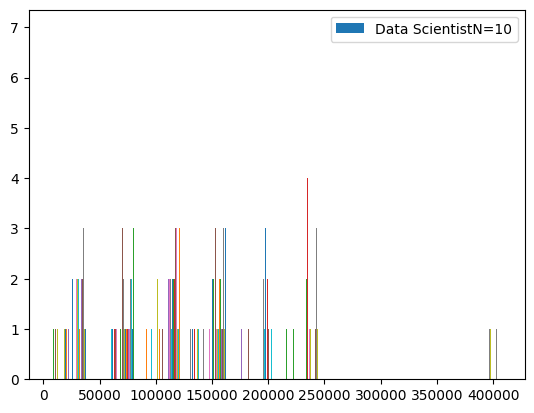

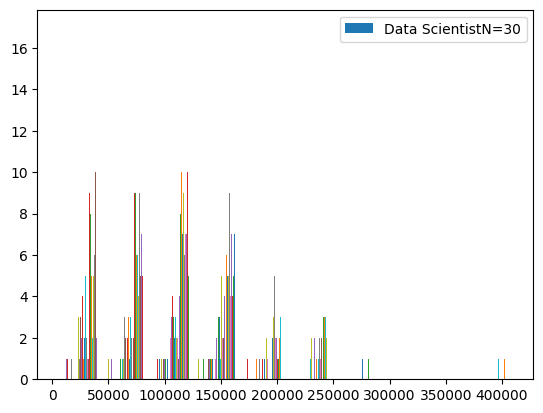

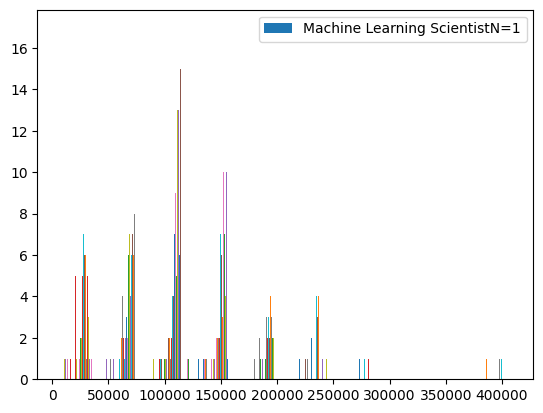

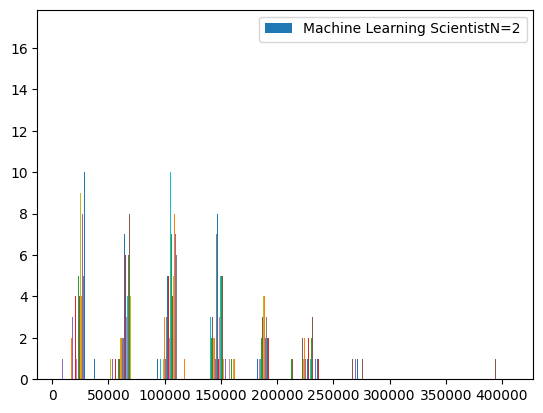

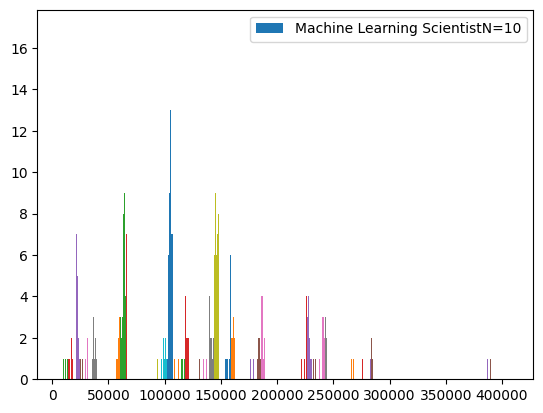

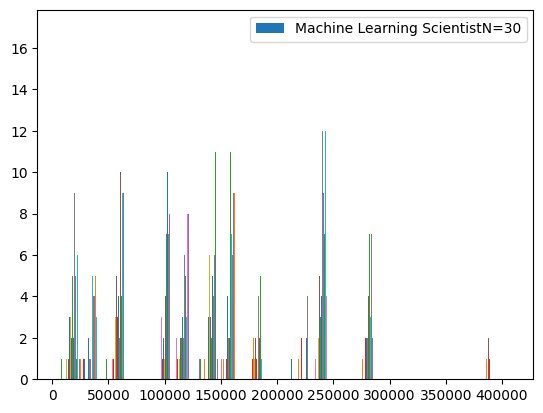

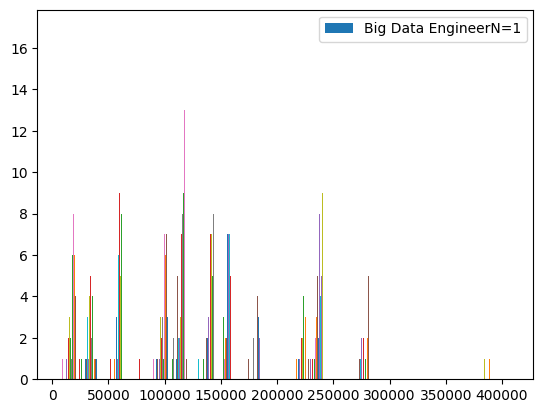

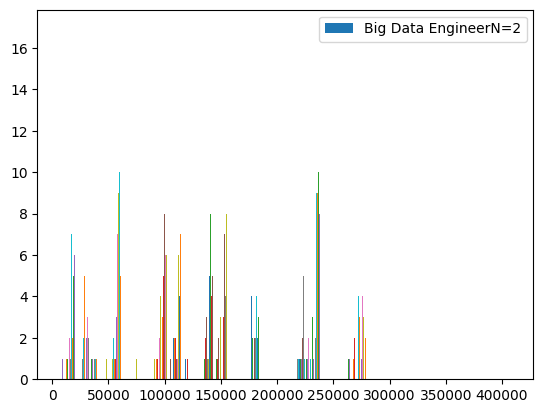

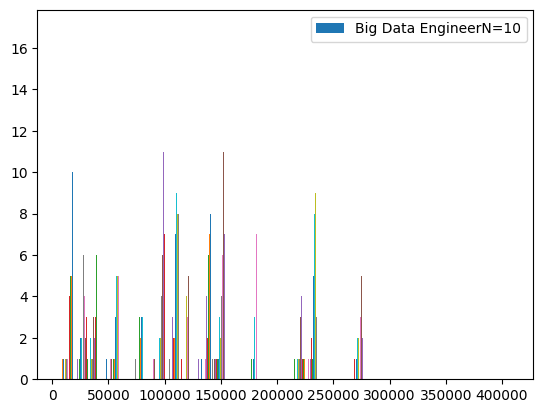

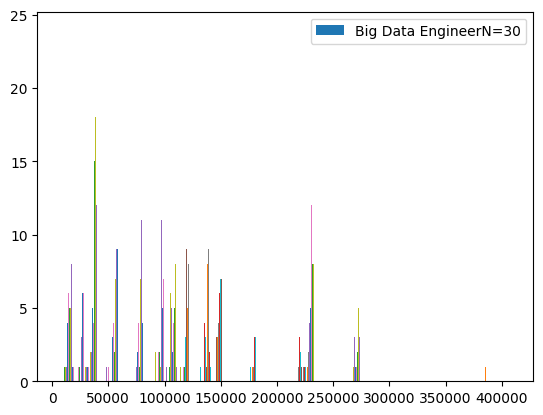

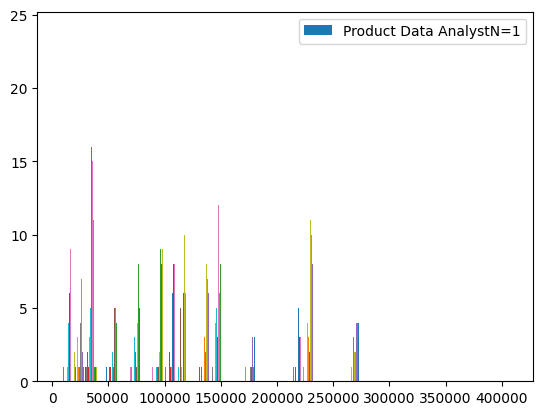

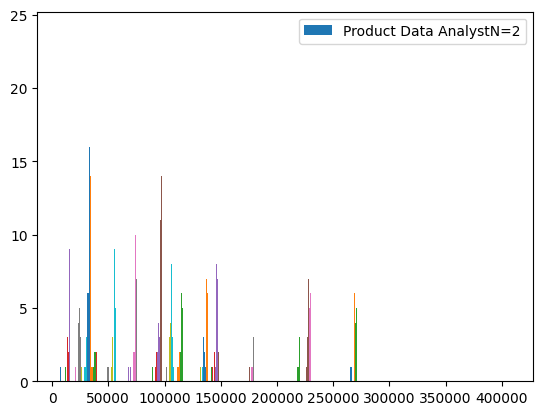

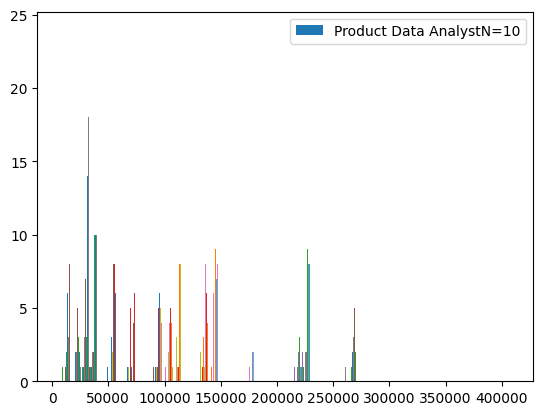

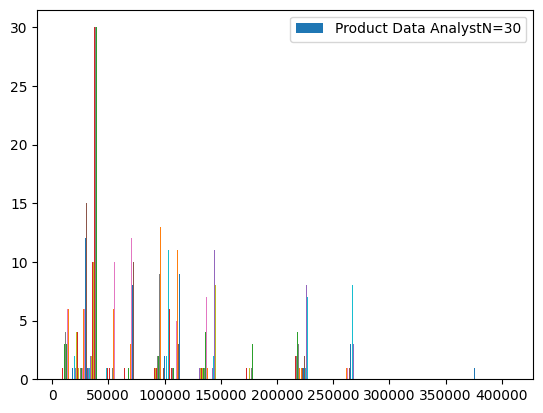

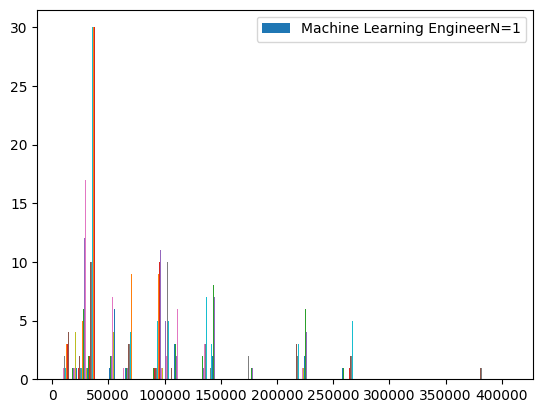

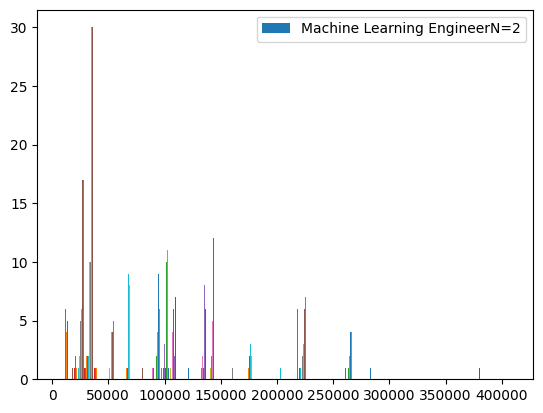

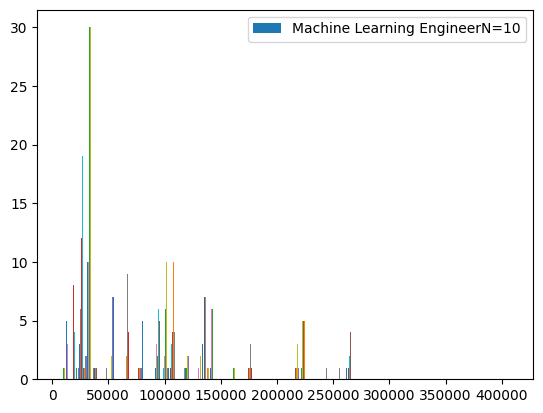

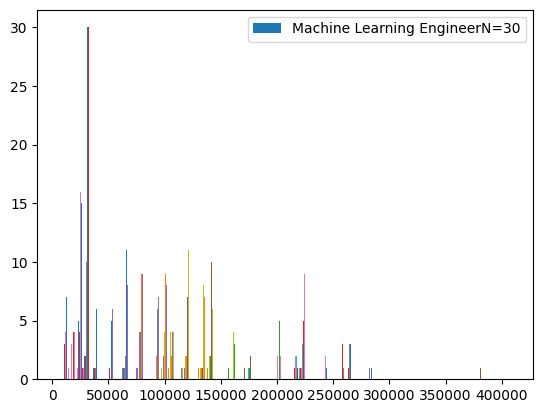

In [6]:
sal=[]
for job in significant_jobs:
    for N in [1, 2, 10, 30]:
      for n in range(1000): 
         DATA=data.loc[data['job_title']==job]
         salaries=np.random.choice(np.array(DATA['salary_in_usd']), size=N)
         salaries.mean()
         sal.append(salaries)
      plt.hist(sal, label=job+'N='+str(N))
      plt.legend()
      plt.show()

In [7]:

#DATA